# 38 - Common Statistical Fallacies

**Key Idea:** People often make mistakes when interpreting statistics. Understanding these common fallacies helps us think more clearly about data.

## Three Major Fallacies:

1. **Correlation ≠ Causation:** Two things happening together doesn't mean one causes the other
2. **Gambler's Fallacy:** Thinking random events are "due" to happen
3. **Regression to the Mean:** Extreme performances tend to move back toward average

## Simple Example: Ice Cream and Shark Attacks

Ice cream sales and shark attacks both increase in summer. Does ice cream cause shark attacks? No! Hot weather causes both.

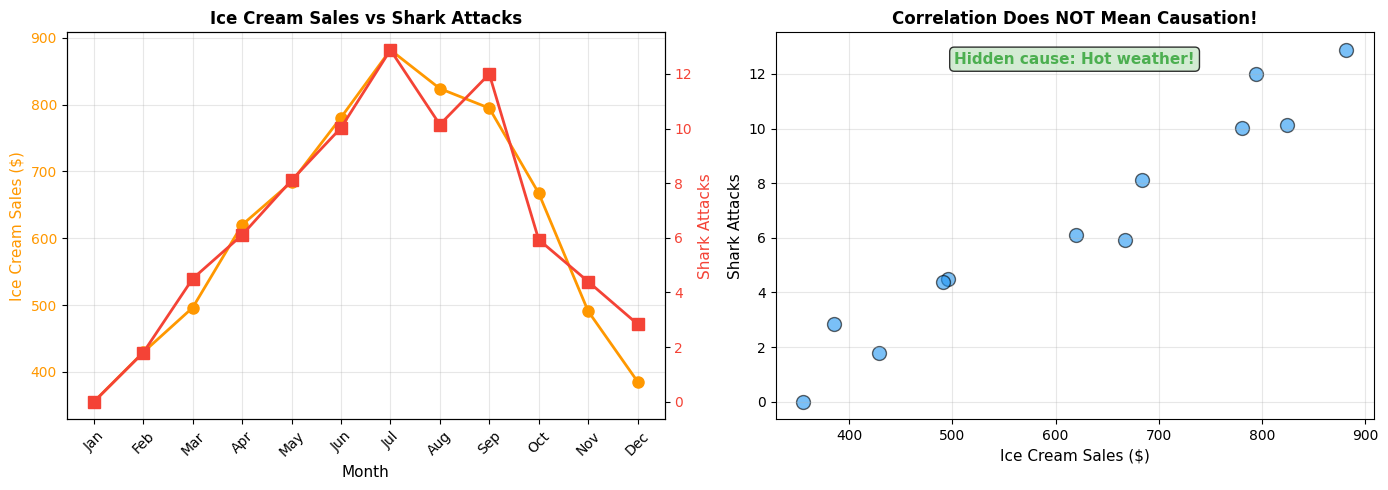


📊 What we see: Ice cream sales and shark attacks rise together
❌ WRONG conclusion: Ice cream causes shark attacks
✅ RIGHT conclusion: Hot weather causes both!

→ Correlation ≠ Causation


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Months of the year
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Temperature (the hidden cause)
temperature = np.array([35, 40, 50, 62, 72, 82, 88, 86, 78, 65, 50, 38])

# Ice cream sales (correlated with temperature)
ice_cream = temperature * 10 + np.random.normal(0, 50, 12)

# Shark attacks (also correlated with temperature)
shark_attacks = (temperature - 30) / 5 + np.random.normal(0, 1, 12)
shark_attacks = np.maximum(shark_attacks, 0)  # No negative attacks

# Visualize the correlation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Time series showing both variables
ax1_twin = ax1.twinx()
line1 = ax1.plot(months, ice_cream, 'o-', color='#FF9800', linewidth=2, markersize=8, label='Ice Cream Sales')
line2 = ax1_twin.plot(months, shark_attacks, 's-', color='#F44336', linewidth=2, markersize=8, label='Shark Attacks')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Ice Cream Sales ($)', fontsize=11, color='#FF9800')
ax1_twin.set_ylabel('Shark Attacks', fontsize=11, color='#F44336')
ax1.set_title('Ice Cream Sales vs Shark Attacks', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#FF9800')
ax1_twin.tick_params(axis='y', labelcolor='#F44336')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# Scatter plot showing correlation
ax2.scatter(ice_cream, shark_attacks, s=100, alpha=0.6, color='#2196F3', edgecolor='black')
ax2.set_xlabel('Ice Cream Sales ($)', fontsize=11)
ax2.set_ylabel('Shark Attacks', fontsize=11)
ax2.set_title('Correlation Does NOT Mean Causation!', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.text(0.5, 0.95, 'Hidden cause: Hot weather!', 
         transform=ax2.transAxes, fontsize=11, color='#4CAF50',
         fontweight='bold', ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='#C8E6C9', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n📊 What we see: Ice cream sales and shark attacks rise together")
print("❌ WRONG conclusion: Ice cream causes shark attacks")
print("✅ RIGHT conclusion: Hot weather causes both!")
print("\n→ Correlation ≠ Causation")

## Gambler's Fallacy: The Coin is NOT "Due"

After 5 tails in a row, many people think heads is "due" to come up. But the coin has no memory! Each flip is still 50/50.

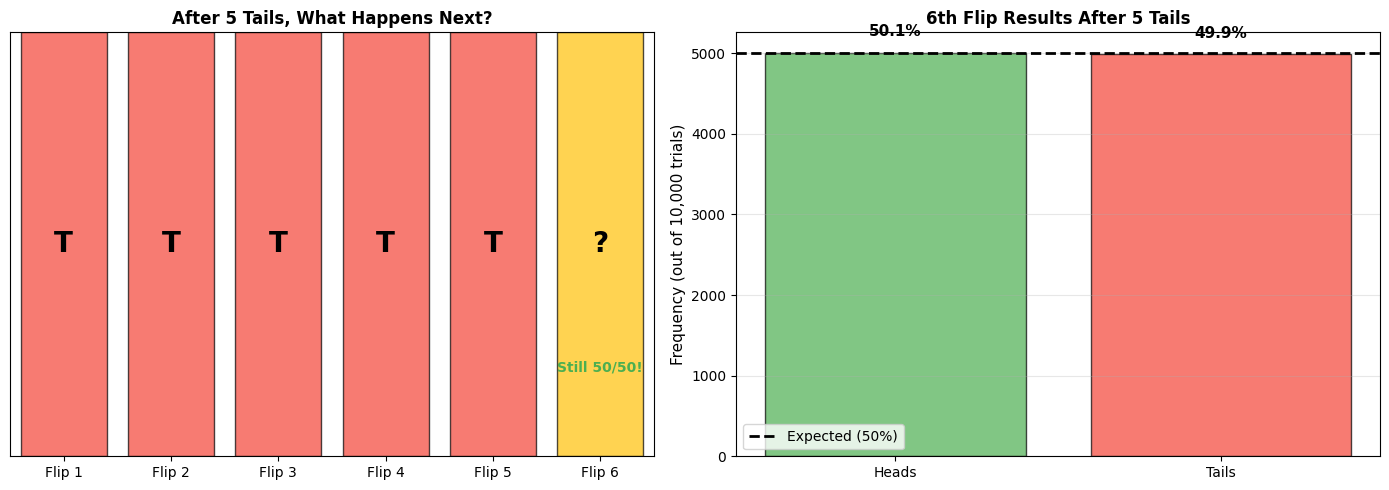


After 5 tails in a row, the 6th flip was:
  Heads: 5,009 times (50.1%)
  Tails: 4,991 times (49.9%)

❌ Gambler's Fallacy: Thinking heads is 'due' to come up
✅ Reality: Each flip is independent - always 50/50!

→ Past random events don't influence future ones


In [2]:
# Simulate coin flips
np.random.seed(42)

# Simulate 1000 sequences of "5 tails then 1 more flip"
num_trials = 10000
sixth_flip_results = []

for _ in range(num_trials):
    # Flip until we get 5 tails in a row
    flips = []
    while len(flips) < 5 or flips[-5:] != ['T']*5:
        flips.append(np.random.choice(['H', 'T']))
    
    # Now flip one more time
    next_flip = np.random.choice(['H', 'T'])
    sixth_flip_results.append(next_flip)

heads_count = sixth_flip_results.count('H')
tails_count = sixth_flip_results.count('T')

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Show sequence
sequence = ['T', 'T', 'T', 'T', 'T', '?']
colors = ['#F44336']*5 + ['#FFC107']
ax1.bar(range(len(sequence)), [1]*len(sequence), color=colors, edgecolor='black', alpha=0.7)
for i, flip in enumerate(sequence):
    ax1.text(i, 0.5, flip, ha='center', va='center', fontsize=20, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.set_xlim(-0.5, 5.5)
ax1.set_xticks(range(len(sequence)))
ax1.set_xticklabels(['Flip 1', 'Flip 2', 'Flip 3', 'Flip 4', 'Flip 5', 'Flip 6'])
ax1.set_title('After 5 Tails, What Happens Next?', fontsize=12, fontweight='bold')
ax1.set_yticks([])
ax1.text(5, 0.2, 'Still 50/50!', ha='center', fontsize=10, color='#4CAF50', fontweight='bold')

# Show actual results
ax2.bar(['Heads', 'Tails'], [heads_count, tails_count], color=['#4CAF50', '#F44336'], 
        alpha=0.7, edgecolor='black')
ax2.axhline(num_trials/2, color='black', linestyle='--', linewidth=2, label='Expected (50%)')
ax2.set_ylabel('Frequency (out of 10,000 trials)', fontsize=11)
ax2.set_title(f'6th Flip Results After 5 Tails', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add percentages on bars
for i, (label, count) in enumerate([('Heads', heads_count), ('Tails', tails_count)]):
    ax2.text(i, count + 200, f'{count/num_trials*100:.1f}%', 
            ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nAfter 5 tails in a row, the 6th flip was:")
print(f"  Heads: {heads_count:,} times ({heads_count/num_trials*100:.1f}%)")
print(f"  Tails: {tails_count:,} times ({tails_count/num_trials*100:.1f}%)")
print("\n❌ Gambler's Fallacy: Thinking heads is 'due' to come up")
print("✅ Reality: Each flip is independent - always 50/50!")
print("\n→ Past random events don't influence future ones")

## Regression to the Mean: Extreme Performance Returns to Average

After an unusually good or bad performance, the next one is likely to be more average. This is just statistics, not a trend!

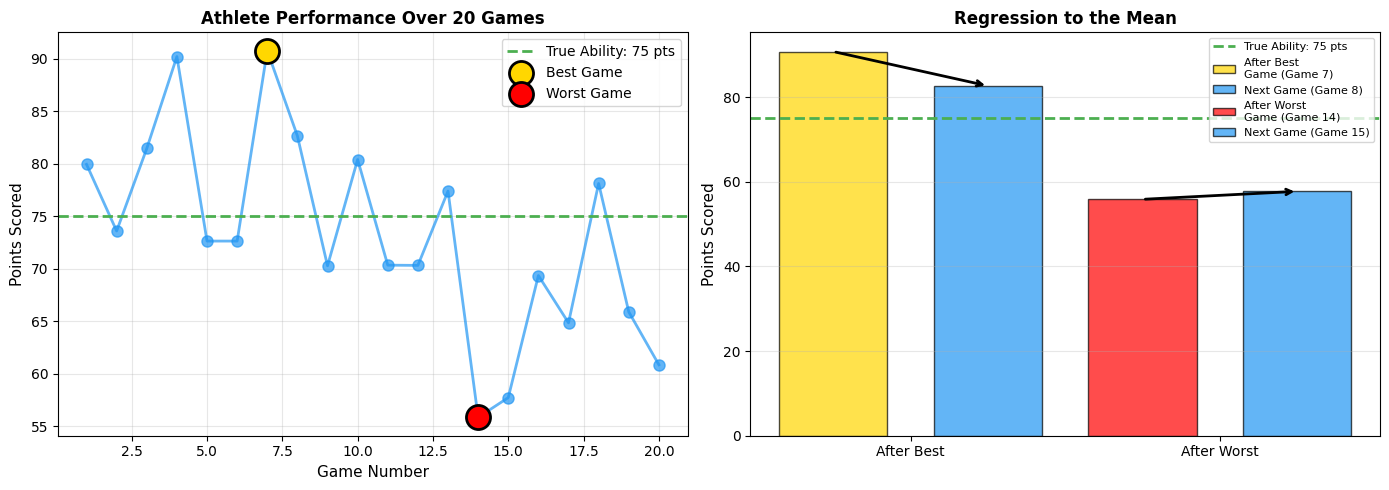


Athlete's true ability: 75 points

Best game (#7): 90.8 pts
Next game (#8): 82.7 pts → Closer to average!

Worst game (#14): 55.9 pts
Next game (#15): 57.8 pts → Closer to average!

→ Extreme performances naturally move back toward average
→ This is statistics, not proof of improvement or decline!


In [3]:
# Simulate athlete performance
np.random.seed(42)

# Athlete's true ability (mean performance)
true_ability = 75
variability = 10

# Simulate 20 games
games = np.arange(1, 21)
performance = np.random.normal(true_ability, variability, 20)

# Find extreme performances
extreme_high_idx = np.argmax(performance)
extreme_low_idx = np.argmin(performance)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Performance over time
ax1.plot(games, performance, 'o-', color='#2196F3', linewidth=2, markersize=8, alpha=0.7)
ax1.axhline(true_ability, color='#4CAF50', linestyle='--', linewidth=2, 
           label=f'True Ability: {true_ability} pts')
ax1.scatter(games[extreme_high_idx], performance[extreme_high_idx], 
           s=300, color='gold', edgecolor='black', linewidth=2, zorder=5, label='Best Game')
ax1.scatter(games[extreme_low_idx], performance[extreme_low_idx], 
           s=300, color='red', edgecolor='black', linewidth=2, zorder=5, label='Worst Game')
ax1.set_xlabel('Game Number', fontsize=11)
ax1.set_ylabel('Points Scored', fontsize=11)
ax1.set_title('Athlete Performance Over 20 Games', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Show regression to mean for extreme games
extreme_games = [extreme_high_idx, extreme_low_idx]
labels = ['After Best\nGame', 'After Worst\nGame']
colors = ['gold', 'red']

for i, (idx, label, color) in enumerate(zip(extreme_games, labels, colors)):
    if idx < len(performance) - 1:
        extreme_perf = performance[idx]
        next_perf = performance[idx + 1]
        
        x_pos = i * 2
        ax2.bar([x_pos], [extreme_perf], width=0.7, color=color, alpha=0.7, 
               edgecolor='black', label=f'{label} (Game {idx+1})')
        ax2.bar([x_pos + 1], [next_perf], width=0.7, color='#2196F3', alpha=0.7,
               edgecolor='black', label=f'Next Game (Game {idx+2})')
        
        # Arrow showing regression
        ax2.annotate('', xy=(x_pos + 1, next_perf), xytext=(x_pos, extreme_perf),
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))

ax2.axhline(true_ability, color='#4CAF50', linestyle='--', linewidth=2, 
           label=f'True Ability: {true_ability} pts')
ax2.set_ylabel('Points Scored', fontsize=11)
ax2.set_title('Regression to the Mean', fontsize=12, fontweight='bold')
ax2.set_xticks([0.5, 2.5])
ax2.set_xticklabels(['After Best', 'After Worst'])
ax2.legend(loc='upper right', fontsize=8)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAthlete's true ability: {true_ability} points")
print(f"\nBest game (#{extreme_high_idx+1}): {performance[extreme_high_idx]:.1f} pts")
if extreme_high_idx < len(performance) - 1:
    print(f"Next game (#{extreme_high_idx+2}): {performance[extreme_high_idx+1]:.1f} pts → Closer to average!")

print(f"\nWorst game (#{extreme_low_idx+1}): {performance[extreme_low_idx]:.1f} pts")
if extreme_low_idx < len(performance) - 1:
    print(f"Next game (#{extreme_low_idx+2}): {performance[extreme_low_idx+1]:.1f} pts → Closer to average!")

print("\n→ Extreme performances naturally move back toward average")
print("→ This is statistics, not proof of improvement or decline!")

## Real-World Business Example: Weekly Sales Panic

A business sees sales dip one week and panics, changing their entire marketing strategy. But it was just normal variation - sales would have bounced back anyway (regression to the mean).

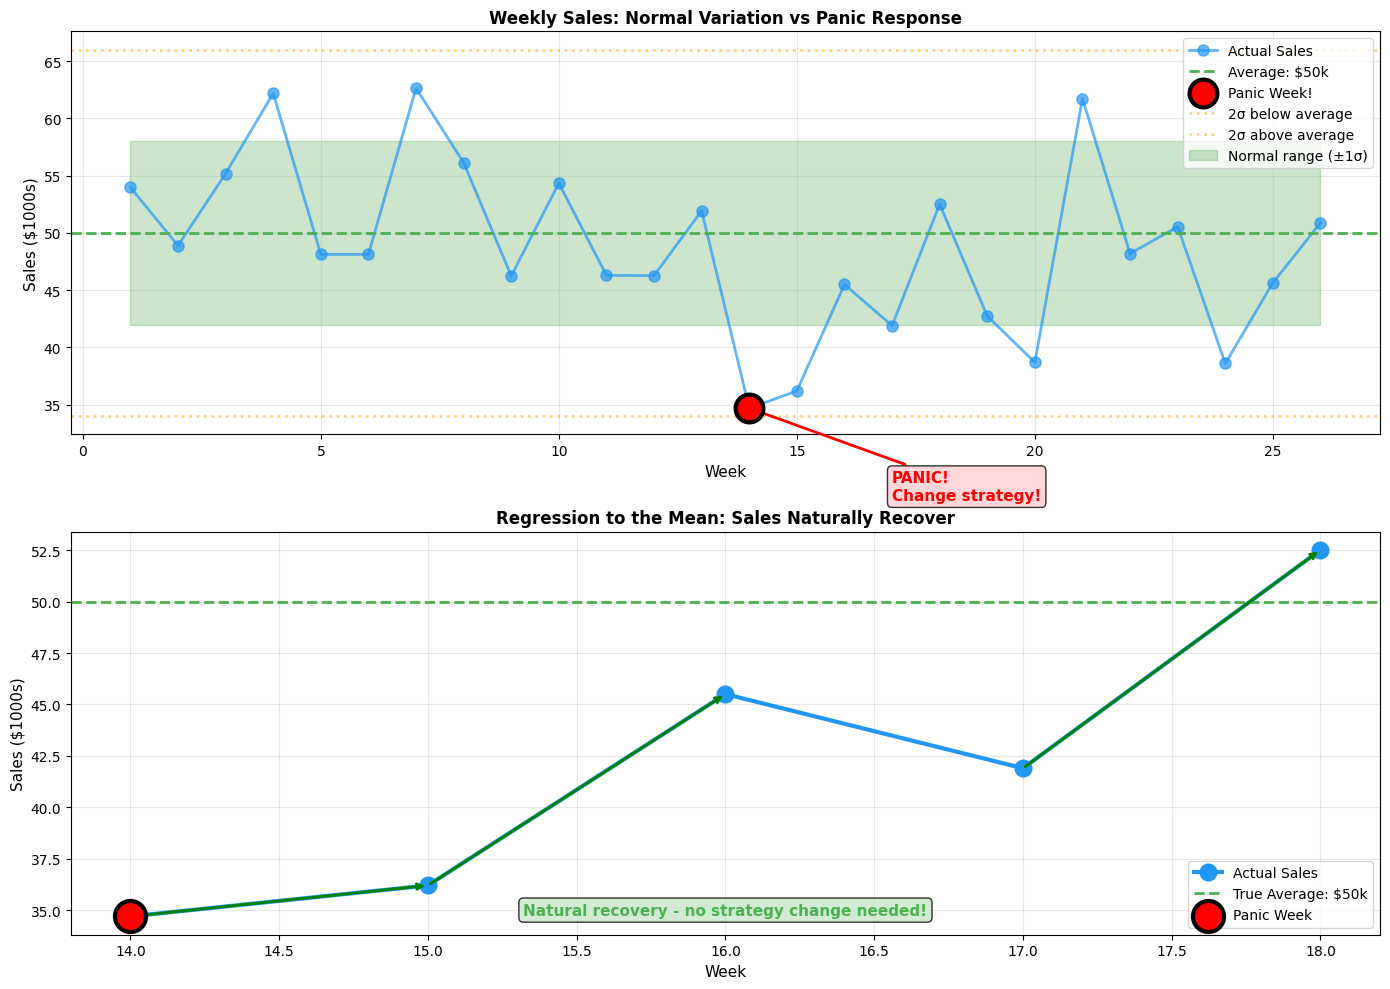


📊 Sales Analysis:
   Average weekly sales: $50k
   Normal variation: ±$8k

⚠️ Week 14: Sales dropped to $34.7k
   → Management panics and changes marketing strategy

📈 Next 4 weeks: $36.2k, $45.5k, $41.9k, $52.5k
   → Average recovery: $44.0k

❌ WRONG interpretation: New strategy fixed sales!
✅ RIGHT interpretation: Natural regression to the mean

💡 Business Lesson:
   → Don't overreact to single data points
   → Expect extreme values to regress toward average
   → Wait for sustained patterns before changing strategy
   → Only worry if sales stay below $34.0k for multiple weeks


In [4]:
# Simulate weekly sales data
np.random.seed(42)

# Normal business: average $50k/week with $8k variation
true_average = 50
weekly_variation = 8
num_weeks = 26  # 6 months

# Generate sales data
weeks = np.arange(1, num_weeks + 1)
sales = np.random.normal(true_average, weekly_variation, num_weeks)

# Find the worst week
worst_week_idx = np.argmin(sales)
worst_week = worst_week_idx + 1

# What happens in the 4 weeks after worst week?
recovery_weeks = min(4, num_weeks - worst_week_idx - 1)
recovery_sales = sales[worst_week_idx+1:worst_week_idx+1+recovery_weeks]

# Visualize
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Full sales timeline
ax1.plot(weeks, sales, 'o-', color='#2196F3', linewidth=2, markersize=8, alpha=0.7, label='Actual Sales')
ax1.axhline(true_average, color='#4CAF50', linestyle='--', linewidth=2, label=f'Average: ${true_average}k')
ax1.scatter(worst_week, sales[worst_week_idx], s=400, color='red', 
           edgecolor='black', linewidth=3, zorder=5, label=f'Panic Week!')
ax1.axhline(true_average - 2*weekly_variation, color='orange', linestyle=':', 
           linewidth=2, alpha=0.5, label='2σ below average')
ax1.axhline(true_average + 2*weekly_variation, color='orange', linestyle=':', 
           linewidth=2, alpha=0.5, label='2σ above average')
ax1.fill_between(weeks, true_average - weekly_variation, true_average + weekly_variation,
                alpha=0.2, color='green', label='Normal range (±1σ)')
ax1.set_xlabel('Week', fontsize=11)
ax1.set_ylabel('Sales ($1000s)', fontsize=11)
ax1.set_title('Weekly Sales: Normal Variation vs Panic Response', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(alpha=0.3)
ax1.annotate('PANIC!\nChange strategy!', 
            xy=(worst_week, sales[worst_week_idx]), 
            xytext=(worst_week + 3, sales[worst_week_idx] - 8),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'),
            fontsize=11, color='red', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='#FFCDD2', alpha=0.8))

# Zoom in on recovery period
recovery_period = np.arange(worst_week, min(worst_week + 5, num_weeks + 1))
recovery_period_sales = sales[worst_week_idx:worst_week_idx+5] if worst_week_idx+5 <= num_weeks else sales[worst_week_idx:]

ax2.plot(recovery_period, recovery_period_sales, 'o-', 
        color='#2196F3', linewidth=3, markersize=12, label='Actual Sales')
ax2.axhline(true_average, color='#4CAF50', linestyle='--', linewidth=2, label=f'True Average: ${true_average}k')
ax2.scatter(worst_week, sales[worst_week_idx], s=500, color='red', 
           edgecolor='black', linewidth=3, zorder=5, label='Panic Week')

# Show recovery trend
for i in range(1, len(recovery_period)):
    if recovery_period_sales[i] > recovery_period_sales[i-1]:
        ax2.annotate('', xy=(recovery_period[i], recovery_period_sales[i]), 
                    xytext=(recovery_period[i-1], recovery_period_sales[i-1]),
                    arrowprops=dict(arrowstyle='->', lw=2, color='green'))

ax2.set_xlabel('Week', fontsize=11)
ax2.set_ylabel('Sales ($1000s)', fontsize=11)
ax2.set_title('Regression to the Mean: Sales Naturally Recover', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.text(0.5, 0.05, 'Natural recovery - no strategy change needed!', 
        transform=ax2.transAxes, fontsize=11, color='#4CAF50',
        fontweight='bold', ha='center',
        bbox=dict(boxstyle='round', facecolor='#C8E6C9', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n📊 Sales Analysis:")
print(f"   Average weekly sales: ${true_average}k")
print(f"   Normal variation: ±${weekly_variation}k")
print(f"\n⚠️ Week {worst_week}: Sales dropped to ${sales[worst_week_idx]:.1f}k")
print(f"   → Management panics and changes marketing strategy")
print(f"\n📈 Next 4 weeks: ", end="")
for i, sale in enumerate(recovery_sales):
    print(f"${sale:.1f}k", end=", " if i < len(recovery_sales)-1 else "")
print(f"\n   → Average recovery: ${np.mean(recovery_sales):.1f}k")

print("\n❌ WRONG interpretation: New strategy fixed sales!")
print("✅ RIGHT interpretation: Natural regression to the mean")

print("\n💡 Business Lesson:")
print("   → Don't overreact to single data points")
print("   → Expect extreme values to regress toward average")
print("   → Wait for sustained patterns before changing strategy")
print(f"   → Only worry if sales stay below ${true_average - 2*weekly_variation:.1f}k for multiple weeks")

## Summary: Avoiding Statistical Fallacies

| Fallacy | Mistake | How to Avoid |
|---------|---------|-------------|
| **Correlation ≠ Causation** | Assuming relationship means one causes the other | Look for hidden variables; run experiments |
| **Gambler's Fallacy** | Thinking random events are "due" | Remember: independent events stay independent |
| **Regression to Mean** | Treating natural bounce-back as a real trend | Expect extreme values to return to average |
| **Base Rate Neglect** | Ignoring how common something is | Always consider the baseline probability |
| **Small Sample Size** | Drawing conclusions from too little data | Collect more data before deciding |

### Key Takeaways for Data Analytics:

1. **Be skeptical of correlations** - Always ask: "Could there be a hidden cause?"
2. **Randomness has no memory** - Past random events don't predict future ones
3. **Extreme values regress** - Don't overreact to single unusual data points
4. **Consider context** - Look at base rates, sample sizes, and alternative explanations
5. **Test, don't assume** - Run experiments to establish causation

**Pro tip:** When making business decisions, wait for sustained patterns over multiple time periods, not single extreme values!